In [1]:
import pandas as pd
person_path = "/home/dsv/qida0163/TimeSeries/CSDI/data/simulation_data/Scenario1-1/output data-2.15(yamada@vri)/outputPersonInfo_clean.csv"
sim_path = "/home/dsv/qida0163/TimeSeries/CSDI/data/simulation_data/Scenario1-1/output data-2.15(yamada@vri)/simulationLog_clean.csv"

In [2]:
person_info = pd.read_csv(person_path)
sim_info = pd.read_csv(sim_path)

In [9]:
sim_info.head()

,time,personID,posX,posY
0,0.1,1,34.0,14.0
1,0.1,2,61.0,11.0
2,0.2,1,34.0,14.0
3,0.2,2,61.0,11.0
4,0.3,1,34.0,14.0


In [3]:
sim_info_merged = sim_info.merge(person_info, left_on="personID", right_on="PersonID", how='left')

In [8]:
person_info.head()

,PersonID,PersonType,Weight,Radius,MaxSpeed,GenTime,GenID,numGoal,GoalIDarray
0,1,3,60.0000,0.210000,0.00000,0.10,3,1,3
1,2,3,60.0000,0.210000,0.00000,0.10,4,1,4
2,3,1,44.3444,0.186517,1.18156,1.25,2,1,1
3,4,1,61.4589,0.212188,0.57247,1.25,1,1,2
4,5,1,52.2362,0.198354,1.23716,1.25,1,1,2


In [7]:
sim_info_merged.head()

,time,personID,posX,posY,PersonID,PersonType,Weight,Radius,MaxSpeed,GenTime,GenID,numGoal,GoalIDarray
0,0.1,1,34.0,14.0,1,3,60.0,0.21,0.0,0.1,3,1,3
1,0.1,2,61.0,11.0,2,3,60.0,0.21,0.0,0.1,4,1,4
2,0.2,1,34.0,14.0,1,3,60.0,0.21,0.0,0.1,3,1,3
3,0.2,2,61.0,11.0,2,3,60.0,0.21,0.0,0.1,4,1,4
4,0.3,1,34.0,14.0,1,3,60.0,0.21,0.0,0.1,3,1,3


In [9]:
walking_person_info = person_info[person_info["PersonType"]==1]
running_person_info = person_info[person_info["PersonType"]==2]
standing_person_info = person_info[person_info["PersonType"]==3]

In [10]:
print(f"walking perosn: {walking_person_info.shape[0]}")
print(f"running perosn: {running_person_info.shape[0]}")
print(f"standing perosn: {standing_person_info.shape[0]}")

walking perosn: 5153
running perosn: 4946
standing perosn: 2


In [4]:
person_info.head()

,PersonID,PersonType,Weight,Radius,MaxSpeed,GenTime,GenID,numGoal,GoalIDarray
0,1,3,60.0000,0.210000,0.00000,0.10,3,1,3
1,2,3,60.0000,0.210000,0.00000,0.10,4,1,4
2,3,1,44.3444,0.186517,1.18156,1.25,2,1,1
3,4,1,61.4589,0.212188,0.57247,1.25,1,1,2
4,5,1,52.2362,0.198354,1.23716,1.25,1,1,2


In [4]:
sim_info.head()

,time,personID,posX,posY
0,0.1,1,34.0,14.0
1,0.1,2,61.0,11.0
2,0.2,1,34.0,14.0
3,0.2,2,61.0,11.0
4,0.3,1,34.0,14.0


In [6]:
print(f"min posX: {sim_info['posX'].min()}")
print(f"max posX: {sim_info['posX'].max()}")
print(f"min posY: {sim_info['posY'].min()}")
print(f"max posY: {sim_info['posY'].max()}")

min posX: 0.553179
max posX: 83.4449
min posY: 8.01021
max posY: 15.9762


In [20]:
def clean_file(path, new_path):
    # Read the file line by line, stripping trailing commas
    with open(path, "r") as infile, open(new_path, "w") as outfile:
        for line in infile:
            if line.endswith(",\n"):
                outfile.write(line.rstrip(",\n") + "\n")  # Remove trailing comma
            else:
                outfile.write(line)

In [21]:
import os
from pathlib import Path
scenario = ["1-1","2-1","2-2","2-3","3-1","3-2", "4-1"]
for s in scenario:
    if s == "4-1":
        path_sim = "data/simulation_data/Scenario4-1/outputdata-1.6.2021/simulationLog.csv"
        path_info = "data/simulation_data/Scenario4-1/outputdata-1.6.2021/outputPersonInfo.csv"
    else:
        path_sim = f"data/simulation_data/Scenario{s}/output data-2.15(yamada@vri)/simulationLog.csv"
        path_info = f"data/simulation_data/Scenario{s}/output data-2.15(yamada@vri)/outputPersonInfo.csv"
    if not os.path.exists(path_sim):
        print(f"{path_sim} not exist!")
    if not os.path.exists(path_info):
        print(f"{path_info} not exist!")
    new_path_sim = Path(path_sim).with_stem(Path(path_sim).stem + "_clean")
    new_path_info = Path(path_info).with_stem(Path(path_info).stem + "_clean")
    #print(new_path_sim)
    print(new_path_info)
    clean_file(path_sim, new_path_sim)
    clean_file(path_info, new_path_info)


data/simulation_data/Scenario1-1/output data-2.15(yamada@vri)/outputPersonInfo_clean.csv
data/simulation_data/Scenario2-1/output data-2.15(yamada@vri)/outputPersonInfo_clean.csv
data/simulation_data/Scenario2-2/output data-2.15(yamada@vri)/outputPersonInfo_clean.csv
data/simulation_data/Scenario2-3/output data-2.15(yamada@vri)/outputPersonInfo_clean.csv
data/simulation_data/Scenario3-1/output data-2.15(yamada@vri)/outputPersonInfo_clean.csv
data/simulation_data/Scenario3-2/output data-2.15(yamada@vri)/outputPersonInfo_clean.csv
data/simulation_data/Scenario4-1/outputdata-1.6.2021/outputPersonInfo_clean.csv


In [14]:
filtered_df = sim_info[sim_info['personID'] == 1113]

In [16]:
filtered_df

,time,personID,posX,posY
594883,232.8,1113,81.76630,13.95650
595148,232.9,1113,81.52330,13.88240
595413,233.0,1113,81.29300,13.78020
595678,233.1,1113,81.07280,13.65560
595942,233.2,1113,80.84270,13.54120
...,...,...,...,...
663023,263.1,1113,4.77222,8.90113
663211,263.2,1113,4.49263,8.90113
663399,263.3,1113,4.21305,8.90113
663586,263.4,1113,3.93347,8.90113


In [27]:
person_info['numGoal'].unique()

array([1])

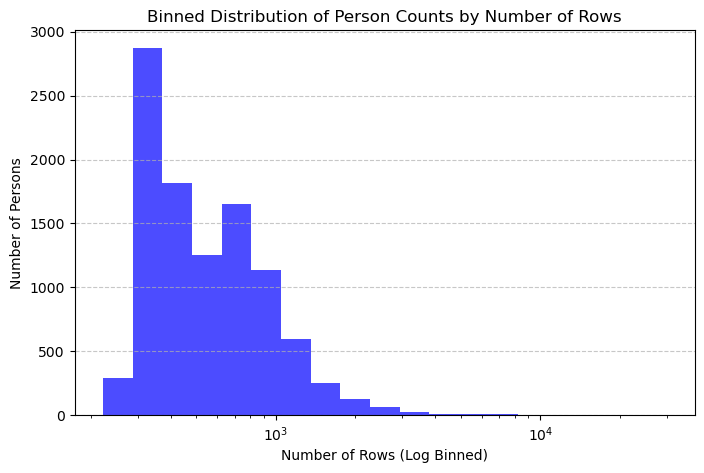

In [20]:
import matplotlib.pyplot as plt
import numpy as np
walk_sim_info = sim_info_merged[sim_info_merged['PersonType']==1]
run_sim_info = sim_info_merged[sim_info_merged['PersonType']==2]
stand_sim_info = sim_info_merged[sim_info_merged['PersonType']==3]
# Count the number of rows for each personID
person_counts = sim_info['personID'].value_counts()

# Count how many persons have the same number of rows
row_distribution = person_counts.value_counts().sort_index()

# Define bins for grouping the number of rows
bins = np.logspace(np.log10(row_distribution.index.min()), np.log10(row_distribution.index.max()), num=20)

# Bin the data and count occurrences in each bin
binned_counts, bin_edges = np.histogram(row_distribution.index, bins=bins, weights=row_distribution.values)

# Plot the binned distribution
plt.figure(figsize=(8, 5))
plt.bar(bin_edges[:-1], binned_counts, width=np.diff(bin_edges), align='edge', color='blue', alpha=0.7)
plt.xscale('log')  # Log scale for x-axis
plt.xlabel('Number of Rows (Log Binned)')
plt.ylabel('Number of Persons')
plt.title('Binned Distribution of Person Counts by Number of Rows')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()